In [672]:
import math
import matplotlib.pyplot as plt

In [673]:
# точность 2-адического числа
e = 20

In [674]:
# универсальная функция
# Принимает на вход вершины с пустыми связями, функцию, с помощью которой будет осуществляться вычисление, а также число которое будет подставляться в mod
def calculate_by_func(verticles: dict, func, n_mod):
    # Для каждой вершины
    for k in verticles.keys():
        # вычисли первую связь
        b = func(k, n_mod)
        # записываем вычисленную связь в вершину
        verticles[k] = set([b])
        # создаём путь пройденный вершиной
        arr = [b]
        while(True):
            # вычисляем следующую связь
            c = func(arr[-1], n_mod)
            # Если вернулись в предыдущую точку, то выходим из цикла
            if (c in arr):
                break
            # Иначе добавляем вычисленную связь в вершину
            else: 
                arr.append(c)
                verticles[k].add(c)

In [675]:
# Функция вычисления f(x) по модулю n из Задания 1
def calculate_f_1(a, n):
    return bin((18 + a - 7*(a**2)) % n)

In [676]:
# функция для вычисления степеней 2
def pows_of_2(limit):
    for p in range(1, limit):
        yield 2 ** p

In [677]:
# список степеней 2 в количестве 20
pows = list(pows_of_2(20))

In [678]:
# определение множителя x на n, чтобы решить уравнение m = log2(|n * x - 1|)
def define_mult(num: int):
    for i in range(1, 200):
        mult = (i * abs(num)) + 1
        if mult in pows:
            return i

In [679]:
# функция для получения 2-адической строки дробей вида -1/n с точностью e
def to_2_adic(num, e):
    # вычисление m, для применения в формуле 2^(m * i)
    m = int((math.log(abs(num * define_mult(num) - 1), 2)))
    # считаем сумму ряда 2^(m*i) точностью e и преобразуем её в бинарную строку
    return bin(sum([2 ** (m*i) for i in range(e)]))

In [680]:
# начало бинарной строки на python, для составления бинарной строки из 0 и 1
start_of_binary_string = '0b'

In [681]:
# mod для бинарных строк
def mod_adic_i(num_adic, i): 
    # преобразуем число в бинарную строку и забираем log2(i) последних разрядов строки
    return start_of_binary_string + bin(num_adic)[int((-math.log(i, 2))):]

In [682]:
# функция для вычисления g(x) из Задания 1 по модулю mod
def calculate_g(num, mod):
    # eval вычисляет бинарную строку и преобразовывает в int
    return bin((17 % mod * num + eval(mod_adic_i(eval(to_2_adic(-11, e)) * define_mult(-11), mod))) % mod)

In [683]:
# Функция вычисления f(x) по модулю n из Задания 2
def calculate_f_2(a, n):
    return bin((((a + 1) ^ 4) ^ (4 * (a & (1 + 2 * a) & (3 + 4 * a) & (7 + 8 * a) & (15 + 16 * a)&(31 + 32 * a) & (63 + 64 * a))) ^ (4 * (a ** 2 + 10))) % n)

In [684]:
# Функция перевода числа в betta представление
def betta_form(a, k, n):
    # убирается специальный символ 0b бинарных строк python
    # и в случае нехватки разрядов(на python лишние разряды отсекаются) дозаполняется 0
    # строка переворачивается в вид x0x1x2...
    reversed_binary = a.replace(start_of_binary_string, '').zfill(k)[::-1]
    #Возвращается сумма ряда x0 + x1 * betta + ...
    return sum([int(reversed_binary[i]) * (2 ** (i/n)) for i in range(k)])

In [685]:
# Функция вычисления точки X, принимающая k разрядов числа и n для betta
def calculate_x_point(a, k, n): 
    return (betta_form(bin(a), k, n) / (2 ** (k/n))) % 1

In [686]:
# Функция вычисления точки Y, принимающая функцию f, x и степень 2 для mod, а также n для betta
def calculate_y_point(func, a, k, n): 
    return (betta_form(func(a, (2 ** k)), k, n) / (2 ** (k/n))) % 1 

In [687]:
# Функция вычисления бета-представления n функции в единичном квадрате I2 = [0,1] x [0,1] с заданной функцией и точностью
def calculate_projection(func, n, k): 
    # создаётся список x, подставляемых в функцию, представляемый собой [0, ..., 2^k - 1]
    array_x = list(range(0, 2 ** k))
    # вычисляем для каждого x, его точку X в проекции по формуле
    array_point_x = [calculate_x_point(i, k, n) for i in array_x]
    # вычисляем для каждого x, его точку Y в проекции по формуле
    array_point_y = [calculate_y_point(func, i, k, n) for i in array_x]
    # используя модуль plt, передаём массивы точек X и точек Y
    return plt.scatter(array_point_x, array_point_y)


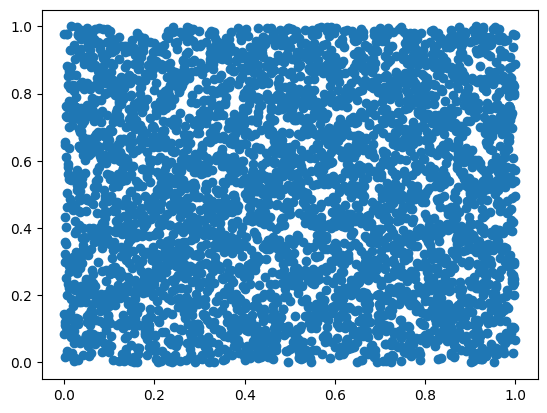

In [688]:
calculate_projection(calculate_f_1, 2, 12)

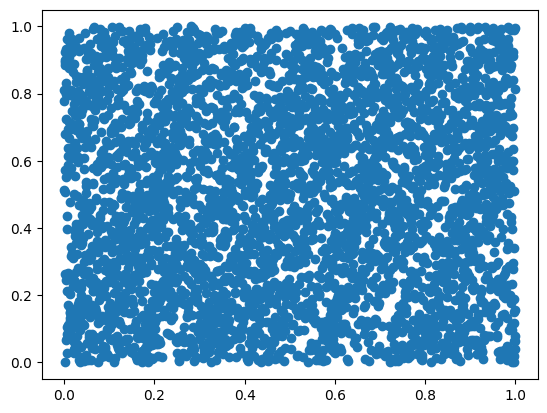

In [689]:
calculate_projection(calculate_g, 2, 12)

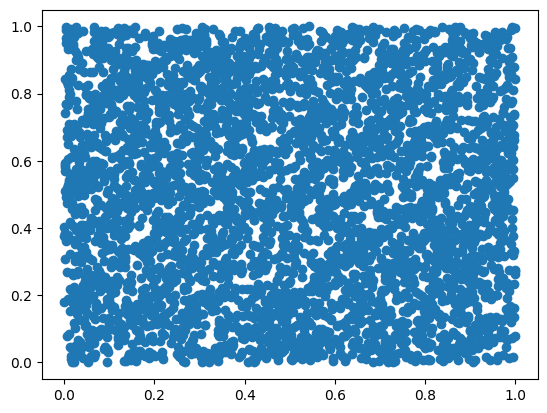

In [690]:
calculate_projection(calculate_f_2, 2, 12)

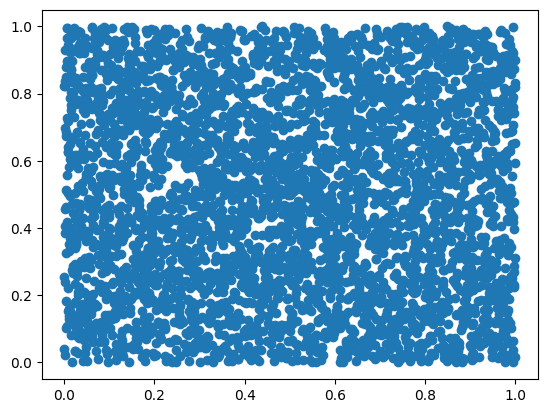

In [691]:
calculate_projection(calculate_f_1, 10, 12)

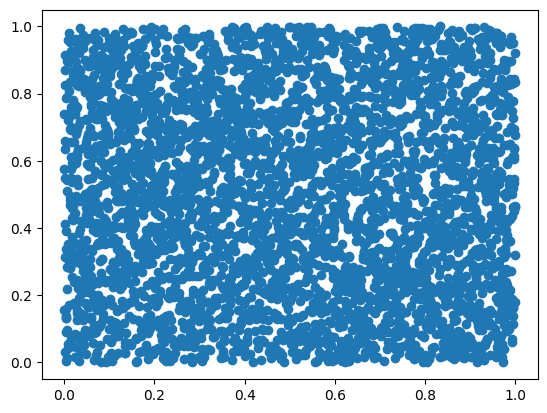

In [692]:
calculate_projection(calculate_g, 10, 12)

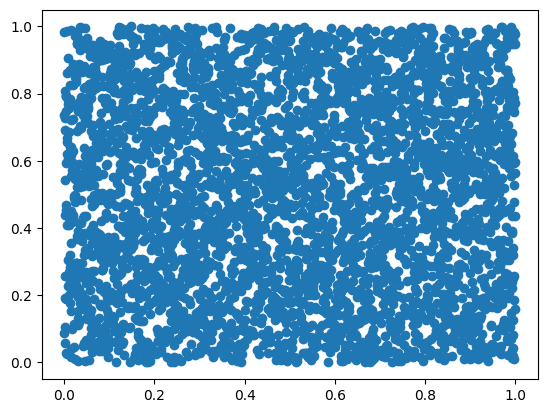

In [693]:
calculate_projection(calculate_f_2, 10, 12)

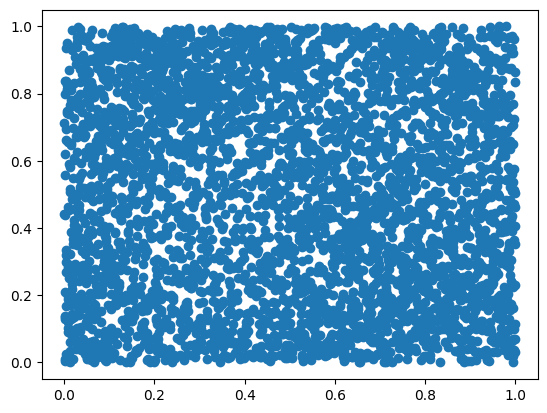

In [694]:
calculate_projection(calculate_f_1, 20, 12)

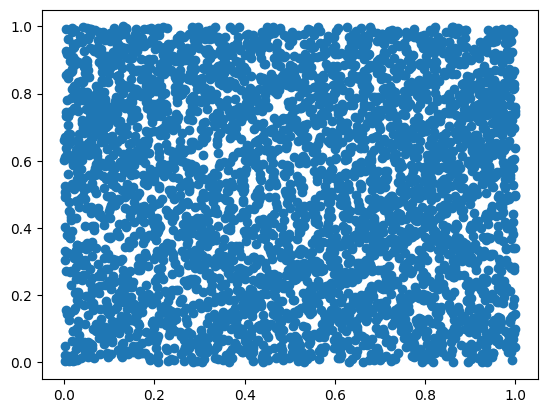

In [695]:
calculate_projection(calculate_g, 20, 12)

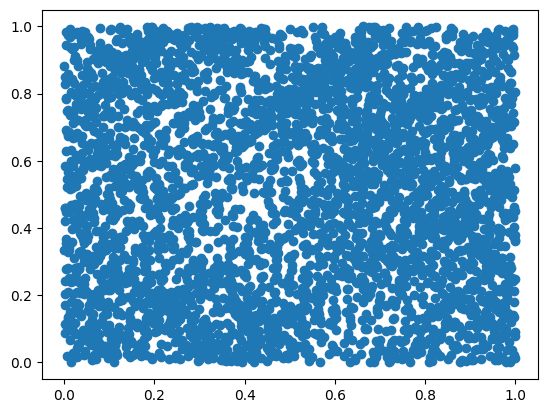

In [696]:
calculate_projection(calculate_f_2, 20, 12)

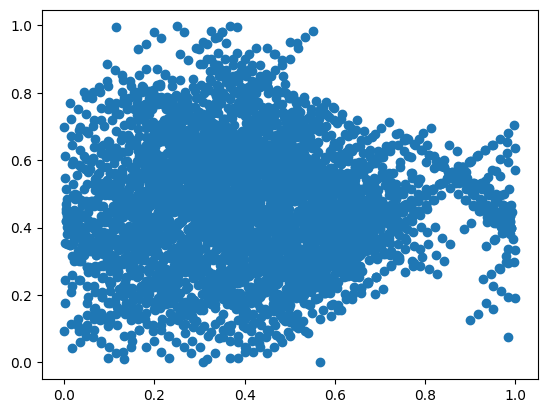

In [697]:
calculate_projection(calculate_f_1, 40, 12)

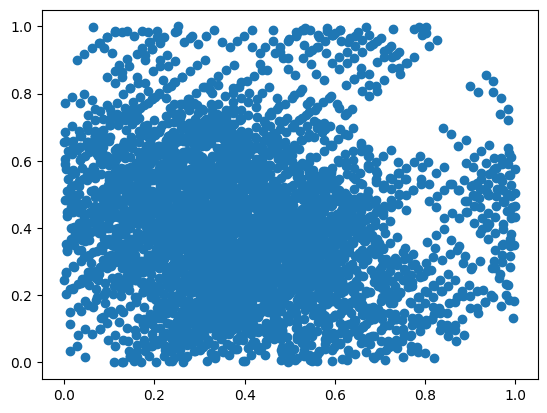

In [698]:
calculate_projection(calculate_g, 40, 12)

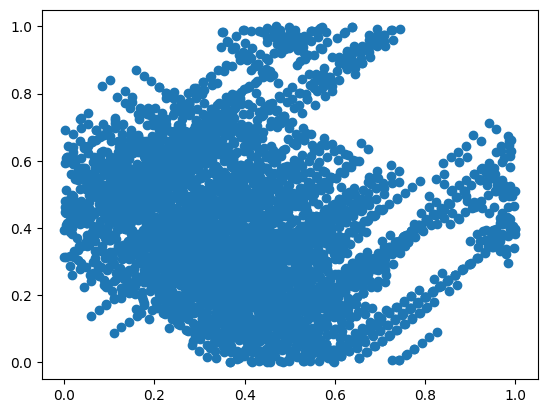

In [699]:
calculate_projection(calculate_f_2, 40, 12)

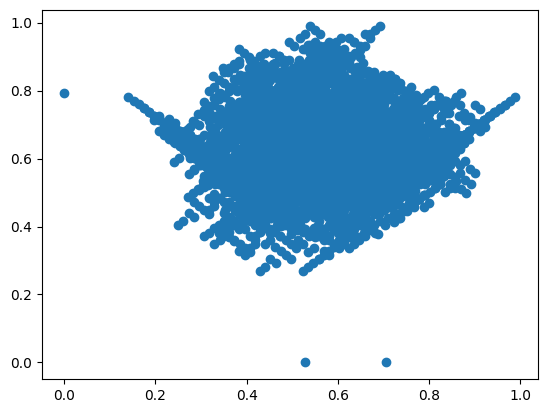

In [700]:
calculate_projection(calculate_f_1, 60, 12)

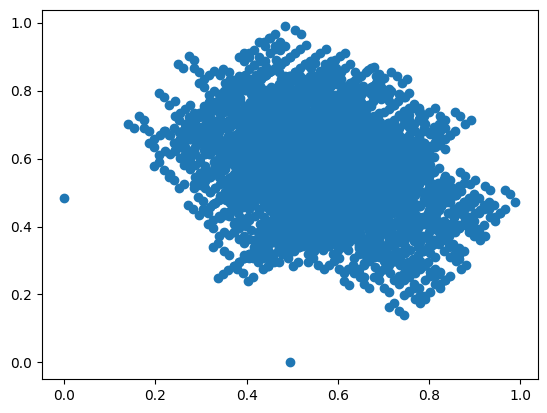

In [701]:
calculate_projection(calculate_g, 60, 12)

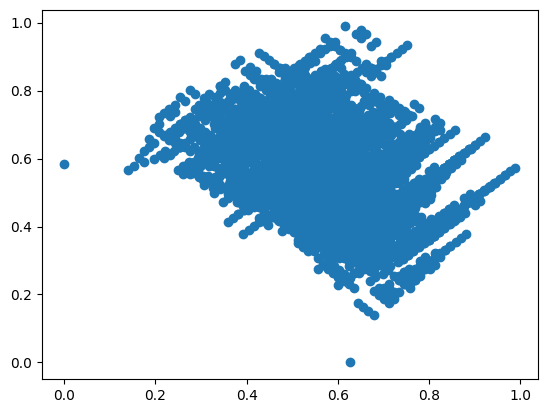

In [702]:
calculate_projection(calculate_f_2, 60, 12)